In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Scores.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- having a correlation value of 0.976 indicates that the Hours of study and the Scores obtained are highly correlated

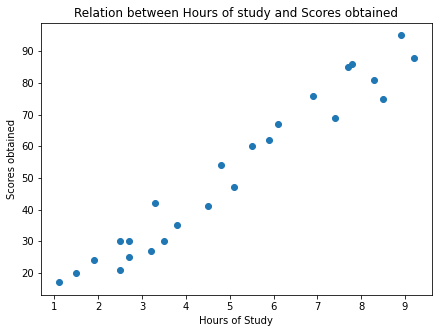

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours of Study')
plt.ylabel('Scores obtained')
plt.title('Relation between Hours of study and Scores obtained')
plt.show()

- From the above visualisation, we can see that the trend is linear in nature

In [7]:
# Splitting of x and y

- splitting into features and target
- features should be 2D (although in case only one feature, we can try using x in 1D)
- target should be 1D

In [8]:
x = df['Hours']
x.ndim

1

In [9]:
x = df[['Hours']].values
x.ndim

2

In [10]:
y = df['Scores'].values
y.ndim

1

In [11]:
# Splitting of data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.75, random_state = 55)

In [14]:
len(xtrain)

18

In [15]:
len(ytrain)

18

In [16]:
len(xtest)

7

In [17]:
len(ytest)

7

## Building a Machine learning model

- Step 1: Import a Model
- Step 2: Create an instance of the model
- Step 3: Train the model
- Step 4: Predict new values

In [18]:
#step 1
from sklearn.linear_model import LinearRegression

In [19]:
#step 2
lr = LinearRegression()

In [20]:
#step 3
lr.fit(xtrain, ytrain)

LinearRegression()

In [21]:
#step 4
ypred = lr.predict(xtest)

In [22]:
ypred

array([92.67250626, 38.46442617, 61.28888094, 30.85627458, 35.61136932,
       23.24812299, 28.95423668])

In [23]:
ytest

array([88, 30, 62, 25, 27, 24, 21], dtype=int64)

In [24]:
list(ypred)

[92.67250625670358,
 38.4644261708974,
 61.28888094386843,
 30.85627457990705,
 35.61136932427601,
 23.248122988916705,
 28.954236682159465]

- The value of slope gives the relation as to how much is change in y for every unit change in x
- It is also called as Marginal Effect

In [25]:
lr.coef_

array([9.51018949])

In [26]:
#y intercept

In [27]:
lr.intercept_

5.178762960314643

## Evaluating the Model 

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(ytest, ypred)

0.9316852571161054

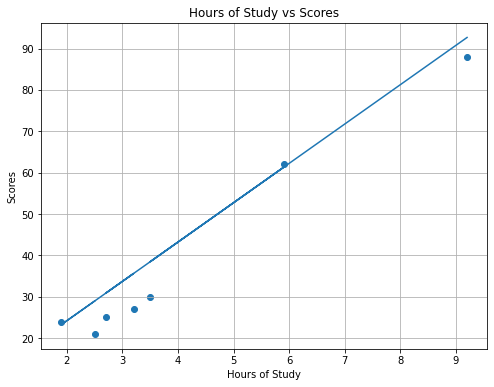

In [35]:
plt.figure(figsize=(8,6))

plt.scatter(xtest, ytest)

plt.plot(xtest, ypred)
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.title('Hours of Study vs Scores')

plt.grid()

plt.show()

## Testing the model on new observation 

In [31]:
lr.predict([[4.4]])

array([47.02359671])

In [32]:
lr.predict([[5]])[0]

52.72971040400429